Dataset Link:https://www.kaggle.com/bhavikbb/password-strength-classifier-dataset


 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset=pd.read_csv("data.csv",error_bad_lines=False)

Skipping line 2810: expected 2 fields, saw 5
Skipping line 4641: expected 2 fields, saw 5
Skipping line 7171: expected 2 fields, saw 5
Skipping line 11220: expected 2 fields, saw 5
Skipping line 13809: expected 2 fields, saw 5
Skipping line 14132: expected 2 fields, saw 5
Skipping line 14293: expected 2 fields, saw 5
Skipping line 14865: expected 2 fields, saw 5
Skipping line 17419: expected 2 fields, saw 5
Skipping line 22801: expected 2 fields, saw 5
Skipping line 25001: expected 2 fields, saw 5
Skipping line 26603: expected 2 fields, saw 5
Skipping line 26742: expected 2 fields, saw 5
Skipping line 29702: expected 2 fields, saw 5
Skipping line 32767: expected 2 fields, saw 5
Skipping line 32878: expected 2 fields, saw 5
Skipping line 35643: expected 2 fields, saw 5
Skipping line 36550: expected 2 fields, saw 5
Skipping line 38732: expected 2 fields, saw 5
Skipping line 40567: expected 2 fields, saw 5
Skipping line 40576: expected 2 fields, saw 5
Skipping line 41864: expected 2 field

In [3]:

##Lets check the head of our data
dataset.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [4]:
##Lets check the shape of data
dataset.shape

(669640, 2)

In [5]:
##Checking the unique values in strength
dataset["strength"].unique()

array([1, 2, 0])

There are only 3 classes in strength
0->Password is weak
1->Medium Password
2->Strong Password

In [ ]:
##Lets see if there are any null values in dataset
dataset.isnull().sum()

password    0
strength    1
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669640 entries, 0 to 669639
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   password  669639 non-null  object
 1   strength  669640 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 10.2+ MB


In [6]:
##Lets check the record where our value is null
dataset[dataset["password"].isnull()]

,password,strength
367579,NaN,0


As there is only 1 record we can drop our nan values

In [7]:
dataset.dropna(inplace=True)

<Axes: ylabel='count'>

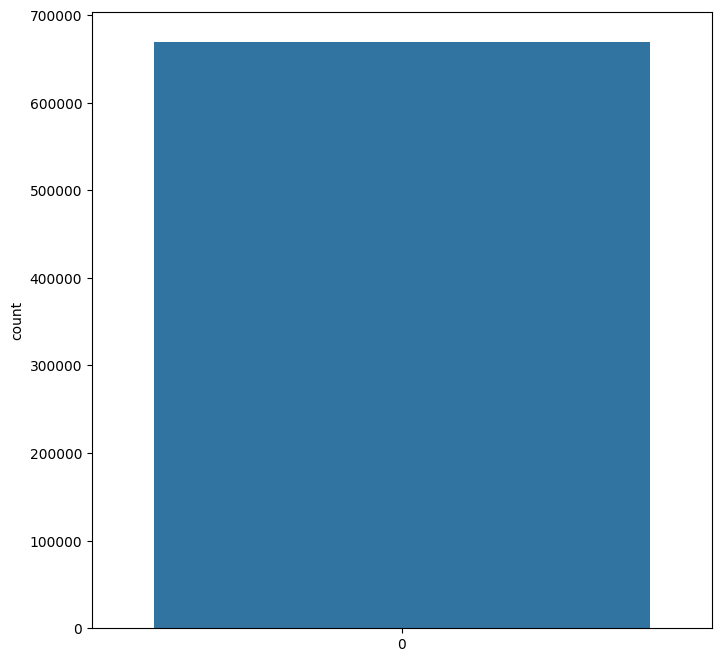

In [8]:
plt.figure(figsize=(8,8))
sns.countplot(dataset.strength)

In [9]:
## converting  dataset  into an array
password_new=np.array(dataset)
password_new

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

In [10]:
type(password_new)

numpy.ndarray

In [11]:
password_new[0]

array(['kzde5577', 1], dtype=object)

In [12]:
##Extracting the password from data
password_new[0][0]

'kzde5577'

In [13]:
#DATA SHUFFLING
import random
random.shuffle(password_new)

In [14]:
password_new

array([['kzde5577', 1],
       ['kzde5577', 1],
       ['kino3434', 1],
       ...,
       ['ttne7BDI1NAqcXtG', 2],
       ['lazzyass123', 1],
       ['crotita77', 1]], dtype=object)

In [15]:
##Create dependant and independant feature
X=[passwords[0] for passwords in password_new]
y=[passwords[1] for passwords in password_new]

In [16]:
##Lets check passwords
X

['kzde5577',
 'kzde5577',
 'kino3434',
 'kzde5577',
 'visi7k1yr',
 'lamborghin1',
 'visi7k1yr',
 'lamborghin1',
 'universe2908',
 'megzy123',
 'kzde5577',
 'v1118714',
 'universe2908',
 'AVYq1lDE4MgAZfNt',
 'visi7k1yr',
 'AVYq1lDE4MgAZfNt',
 'visi7k1yr',
 'universe2908',
 '52558000aaa',
 'asv5o9yu',
 'WUt9IZzE0OQ7PkNE',
 'intel1',
 'AVYq1lDE4MgAZfNt',
 'g067057895',
 'AVYq1lDE4MgAZfNt',
 '6975038lp',
 'universe2908',
 'as326159',
 'jerusalem393',
 'faranumar91',
 'sbl571017',
 'schalke04',
 'jerusalem393',
 'universe2908',
 'g067057895',
 'prisonbreak1',
 'cigicigi123',
 'czuodhj972',
 'fk9qi21m',
 'sbl571017',
 'asv5o9yu',
 'idofo673',
 'faranumar91',
 'cigicigi123',
 'idofo673',
 'olmaz.',
 'trabajonet9',
 'as326159',
 'czuodhj972',
 'kzde5577',
 'exitos2009',
 'tamanagung6',
 'openup12',
 'faranumar91',
 '6975038lp',
 'prisonbreak1',
 'AVYq1lDE4MgAZfNt',
 'gaymaids1',
 'exitos2009',
 'universe2908',
 'ejeko677',
 'ok>bdk',
 'openup12',
 'sknq7m0',
 'kjkjkj1',
 'patri1973',
 'khmer10

In [17]:
type(X)

list

In [18]:
##Convert words into characters
def make_chars(inputs):
    characters=[]
    for letter in inputs:
        characters.append(letter)
    return characters

In [19]:
make_chars("team-9")

['t', 'e', 'a', 'm', '-', '9']

In [20]:
#converting word characters into numerical
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(tokenizer=make_chars)


In [21]:
X_=vectorizer.fit_transform(X)

In [22]:
X_.shape

(669639, 127)

In [23]:
vectorizer.get_feature_names_out()

array(['\x02', '\x04', '\x05', '\x08', '\x0e', '\x12', '\x16', '\x17',
       '\x19', '\x1b', '\x1c', '\x1e', ' ', '!', '"', '#', '$', '%', '&',
       '(', ')', '*', '+', '-', '.', '/', '0', '1', '2', '3', '4', '5',
       '6', '7', '8', '9', ';', '<', '=', '>', '?', '@', '[', '\\', ']',
       '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j',
       'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w',
       'x', 'y', 'z', '{', '|', '}', '~', '\x7f', '\x81', '\x8d', '\xa0',
       '¡', '¨', '«', '°', '±', '²', '³', '´', 'µ', '·', 'º', '¼', '¾',
       '¿', '×', 'ß', 'à', 'á', 'â', 'ä', 'å', 'æ', 'ç', 'è', 'ê', 'ï',
       'ð', 'ñ', 'ò', 'ó', 'ô', 'õ', 'ö', '÷', 'ù', 'ú', 'û', 'ü', 'ý',
       'þ', 'ÿ', '—', '‚', '›', '™'], dtype=object)

In [24]:
X_[0]

<1x127 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [25]:
first_=X_[0].T.todense()

In [26]:
vec=pd.DataFrame(first_,index=vectorizer.get_feature_names_out(),columns=['tfidf'])

In [27]:
vec

,tfidf
,0.0
,0.0
,0.0
,0.0
,0.0
...,...
ÿ,0.0
—,0.0
‚,0.0
›,0.0


In [28]:
vec.sort_values(by=['tfidf'],ascending=False)

,tfidf
7,0.592095
5,0.566714
z,0.335552
k,0.291875
d,0.285598
...,...
=,0.000000
<,0.000000
;,0.000000
9,0.000000


In [29]:


x_train,x_test,y_train,y_test=train_test_split(X_,y,test_size=0.27,random_state=42)

In [30]:
x_train.shape,x_test.shape

((488836, 127), (180803, 127))

In [31]:
#Model
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

In [32]:
classifier=[]
classifier.append(LogisticRegression(multi_class='ovr',n_jobs=-1))
classifier.append(LogisticRegression(multi_class='multinomial',solver='newton-cg',n_jobs=-1))
classifier.append(xgb.XGBClassifier(n_jobs=-1))
classifier.append(MultinomialNB())

In [33]:
classifier

[LogisticRegression(multi_class='ovr', n_jobs=-1),
 LogisticRegression(multi_class='multinomial', n_jobs=-1, solver='newton-cg'),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=-1, num_parallel_tree=None,
               predictor=None, random_state=None, ...),
 MultinomialNB()]

In [34]:
result=[]
for model in classifier:
    a=model.fit(x_train,y_train)
    result.append(a.score(x_test,y_test))

In [35]:
result1=pd.DataFrame({'score':result,
                      'algorithms':['logistic_regr_ovr',
                                    'logistic_regr_mutinomial',
                                    'xgboost','naive bayes']})

In [36]:
result1

,score,algorithms
0,0.812509,logistic_regr_ovr
1,0.819107,logistic_regr_mutinomial
2,0.985874,xgboost
3,0.744761,naive bayes


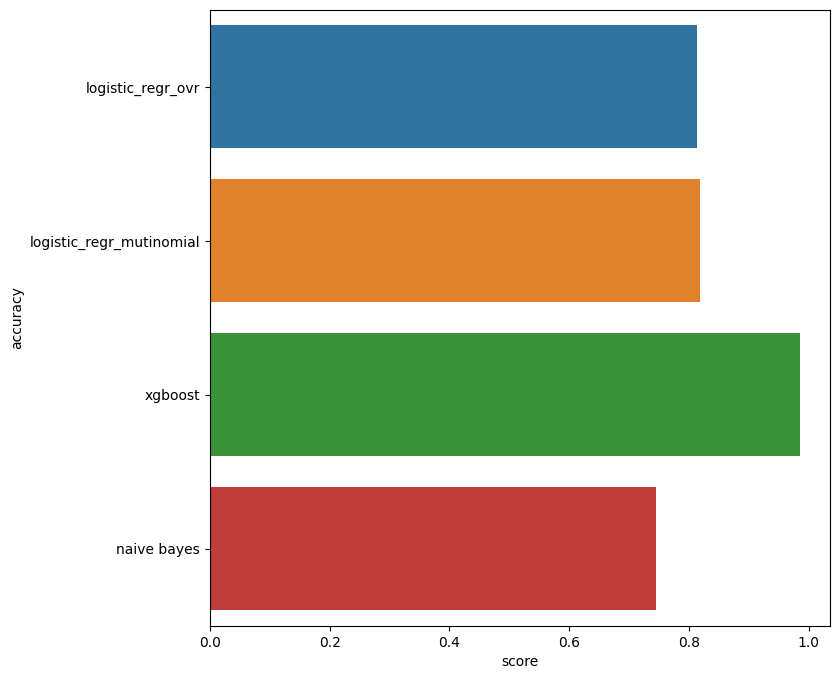

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,8))
a=sns.barplot(x='score',y='algorithms',data=result1)
a.set_ylabel('accuracy')
plt.show()

In [38]:
xgb_classifier=xgb.XGBClassifier(n_jobs=-1)

In [39]:
xgb_classifier.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [40]:
pred=xgb_classifier.predict(x_test)

In [41]:
from sklearn.metrics import confusion_matrix,classification_report

In [42]:
confusion_matrix(y_test,pred)

array([[ 23062,   1107,      0],
       [   739, 133458,    237],
       [     5,    466,  21729]])

In [43]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     24169
           1       0.99      0.99      0.99    134434
           2       0.99      0.98      0.98     22200

    accuracy                           0.99    180803
   macro avg       0.98      0.98      0.98    180803
weighted avg       0.99      0.99      0.99    180803



In [44]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X)
password="abc123@ABC"

In [45]:
password=password.lower()
password_vector=vectorizer.transform([password])

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
clf=DecisionTreeClassifier()

In [56]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

Accuracy score using the taining dataset

In [61]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train, y_train)
accuracy = logit.score(x_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.818907872103892


Model Testing

In [58]:
y_pred=clf.predict(x_test)
y_pred

array([1, 1, 2, ..., 1, 0, 1])

In [59]:
#Accuracy score using the testing dataset
print("Accuray:",clf.score(x_test,y_test))

Accuray: 0.9715214902407593
